Посмотрим на ассоциативные правила

In [76]:
import pandas as pd

In [77]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
from subprocess import check_output
from sklearn.model_selection import train_test_split
from collections import defaultdict
from tqdm import tqdm, tqdm_notebook

In [78]:
order_products = pd.read_csv("../data/input/order_products__prior.csv")

отфильтруем те продукты, которые покупали < 1000 раз

In [79]:
order_products['product_id'].nunique()

49677

In [80]:
products_filtered = order_products['product_id'].value_counts()[order_products['product_id'].value_counts() >= 1000].index.values

In [81]:
len(products_filtered)

5058

In [82]:
sorted_products = np.array(sorted(products_filtered))

In [83]:
product_pos = {product: n for n, product in enumerate(sorted_products)}

In [84]:
order_products_filtered = order_products.loc[order_products['product_id'].isin(products_filtered)]

In [85]:
transactions_dict = defaultdict(list)
for transaction, product_id in zip(order_products_filtered['order_id'], order_products_filtered['product_id']):
    transactions_dict[transaction].append(product_pos[product_id])

In [86]:
algo = 'Apriori'
threshold = '1%'
path_in = '../data/transactions.txt'
path_out = '../data/associative_rules.txt'

In [87]:
with open(path_in, 'w') as f:
#     c = 0
    for k, v in tqdm_notebook(transactions_dict.items()):
#         if c > 100:
#             break
#         c += 1
        f.write(' '.join(map(str, v)) + '\n')

In [88]:
cmd = "java -jar spmf.jar run {} {} {} {}".format(algo, path_in, path_out, threshold)
cmd

'java -jar spmf.jar run Apriori ../data/transactions.txt ../data/associative_rules.txt 1%'

In [89]:
!$cmd

>/root/hse_recsys_project/notebooks/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 5565
 The algorithm stopped at size 2
 Frequent itemsets count : 105
 Maximum memory usage : 679.0298690795898 mb
 Total time ~ 124708 ms


In [72]:
!head $path_out

12288 #SUP: 3
17414 #SUP: 1
13321 #SUP: 1
15370 #SUP: 1
8203 #SUP: 1
3083 #SUP: 1
6155 #SUP: 1
11278 #SUP: 5
12306 #SUP: 2
9234 #SUP: 1


In [ ]:
transactions = 

In [ ]:
np.where()

In [29]:
order_products.shape

(32434489, 4)

In [ ]:
minsupp = "0.1%"
cmd = spmf("Apriori", minsupp)
!$cmd
N = !cat $path_out | wc -l
print('Число частных множест:', N[0].strip())
sets_t1_a = load_file(path_out)

In [ ]:
orders

In [ ]:
transactions = [' '.join(row.nonzero()[0].astype(str)) + '\n' for _, row in df.iterrows()]

with open(path_in, 'w') as f:
    f.writelines(transactions)

сначала загрузим и посмотрим на все файлы, а потом уже будем выполнять задания

In [359]:
#!pip install concepts

In [390]:
#get spmf from http://www.philippe-fournier-viger.com/spmf/spmf.zip

In [134]:
import pandas as pd
import numpy as np
from IPython.display import display, Image, SVG
from concepts import Context, Definition

как можно будет заметить далее, во датасете yahoo нет дополнительной информации по сравнению просто с файлом a.txt

In [3]:
!head data/2_yahoo/us.3k.2k.smat

In [4]:
!head -n 5 data/2_yahoo/us.3k.2k.trms
print('----')
!cat data/2_yahoo/us.3k.2k.trms | wc -l

12a1970 lexmark
2 stacker
21 black jack
2nd mortgage
acapulco hotel
----
    3000


In [5]:
path_raw_in = 'data/1_ads/a.txt'
path_in = 'data/1_ads/a_formatted.txt'
path_out = 'data/output.txt'
task3_files = ['data/3_hse/hse_5282_20_sep_u.txt', 'data/3_hse/hse_5289_20_sep_u.txt', 'data/3_hse/hse_5516_20_sep_u.txt']
spmf = lambda algo, threshold: "java -jar spmf.jar run {} {} {} {}".format(algo, path_in, path_out, threshold)

In [274]:
def process_split(x):
    set_, count = x.strip().split(' #SUP: ')
    set_ = set_.strip()
    set_ = ' '.join([str(x) for x in sorted([int(x) for x in set_.split(' ')])])
    return set_, len(set_.split(' ')), int(count)

def load_file(fname):
    with open(fname, 'r') as f:
        loaded = f.readlines()
    return [process_split(x) for x in loaded]

def parse_rules(line):
    rule, _ = line.split('#SUP:')
    count, conf = _.split('#CONF:')
    rule = rule.strip()
    count = int(count.strip())
    conf = float(conf.strip())
    return rule, count, conf

def human_readable_rules(rule, colnames):
    antecedent, consequent = rule.split('==>')
    antecedent = list(map(int, antecedent.strip().split(' ')))
    consequent = int(consequent.strip())
    human_readable = ' | '.join(colnames[antecedent]) + ' ==> ' + colnames[consequent]
    return human_readable

def load_task3_file(fname):
    df = pd.read_csv(fname, sep = '\t', index_col=False)
    print(df.shape)
    display(df.head(5))
    return df

def filter_df(df, min_row_count, min_col_count, keep_rows_ratio = 0.5, keep_cols_ratio = 0.5, seed = 1):
    row_filter = (df.apply(sum, axis = 1) >= min_row_count)
    col_filter = (df.apply(sum, axis = 0) >= min_col_count)
    df = df.loc[row_filter, col_filter]
    random = np.random.RandomState(seed)
    kept_index = random.choice(df.index, size=int(round(keep_rows_ratio*len(df.index))), replace=False)
    kept_cols = random.choice(df.columns, size=int(round(keep_cols_ratio*len(df.columns))), replace=False)
    df = df.loc[kept_index, kept_cols]
    return df

def generate_context_string(df):
    lines = []
    lines.append('|'.join(df) + '|')
    rows = df.apply(lambda x: '|'.join(x.astype(str)), axis = 1)
    rows = ['|'.join((str(index_), row_.replace('0', ' ').replace('1', 'X'))) + '|'
            for index_, row_ in zip(rows.index, rows.values)]
    lines.extend(rows)
    return('\n'.join(lines))

def save_graph(df, fname, size="10,10!"):
    c = Context.fromstring(generate_context_string(df))
    dot = c.lattice.graphviz()
    dot.attr(size=size)
    dot.format = 'svg'
    output_name = dot.render(fname)
    return output_name

def filter_by_concept(df, concept):
    return df.loc[df.index.isin(concept.objects), df.columns.isin(concept.intent)]

def print_concept_shape(df):
    print_tuple = (df.shape[0], df.shape[1], sum(df.sum().dropna()))
    print('Количество обьектов: %s\nКоличество атрибутов: %s\nКоличество связей обьект-атрибут: %s' % print_tuple)

In [7]:
df = pd.read_csv(path_raw_in, sep = '\t')
print(df.shape)
df.head(5)

(2000, 3000)


,12a1970 lexmark,2 stacker,21 black jack,2nd mortgage,acapulco hotel,accept account card credit merchant,accept card credit,accept card credit online,accessory computer,accessory desk,...,woman,work home,xenadrine,xenical,xenical on line,xxx,yohimbe,yukon,zinc,zyban
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
transactions = [' '.join(row.nonzero()[0].astype(str)) + '\n' for _, row in df.iterrows()]

with open(path_in, 'w') as f:
    f.writelines(transactions)

In [9]:
news = load_task3_file(task3_files[0])

(4125, 319)


,trud.ru,gazeta.ru,utro.ru,expert.ru/,polit.ru,izvestia.ru/,krasrab.com,rian.ru/rian/intro.cfm,grani.ru,inosmi.ru/,...,kavkaz.strana.ru/,tverlife.ru,kik.kgsu.ru,emirat.ru,far.h1.ru,omsktime.ru,7info.ru,vesti.ru,asavali.ge,kp.md
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
money = load_task3_file(task3_files[1])

(4125, 225)


,prime-tass.ru,onlinebroker.ru/,akdi.ru,webmoney.ru,cfin.ru,forextimes.ru/,mfd.ru,djforex.ru,banki.ru,rosbank.ru,...,uvtb.ru,StockBroker.ru,kbdu.ru,bank.infomsk.ru,sia.ru,imoney.com.ua,creditnet.ru,region.ru/,creditural.ru,intrast.ru
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
edu = load_task3_file(task3_files[2])

(4125, 158)


,sachok.ru,nes.ru,specialist.ru/,mifp.ru,improvement.ru,ecsocman.edu.ru/,hse.spb.ru,rsci.ru,students.ru,grabli.net,...,library.nstu.nsk.su,msun.ru,educenter.ru,usue.ru/,kai.ru,tqdk.gov.az,orator.ru,sunnyplus.ru,gaudeamus.ru/,ime-link.ru/
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Задание 1 (30 баллов). Поиск частых множеств.

> **а)** Для массива данных о контекстной рекламе размером 2000 компаний х 3000 словосочетаний найти частые множества для минимальной поддержки minsupp=35. Необходимо указать число таких множеств.

In [12]:
minsupp = "%0.3f%%" % (35/2000*100)
cmd = spmf("Apriori", minsupp)
!$cmd
N = !cat $path_out | wc -l
print('Число частных множест:', N[0].strip())
sets_t1_a = load_file(path_out)

>/Users/alex/Study/HSE_recommender_systems/hw2/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 288295
 The algorithm stopped at size 10
 Frequent itemsets count : 20910
 Maximum memory usage : 28.69769287109375 mb
 Total time ~ 39326 ms
Число частных множест: 20910


> **б)** Повторить подзадание а) для частых замкнутых множеств.

In [13]:
cmd = spmf("AprioriClose", minsupp)
!$cmd
N = !cat $path_out | wc -l
print('Число частных замкнутых множеств:', N[0].strip())
sets_t1_b = load_file(path_out)

>/Users/alex/Study/HSE_recommender_systems/hw2/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 288295
 The algorithm stopped at size 10, because there is no candidate
 Frequent closed itemsets count : 13812
 Maximum memory usage : 162.13201141357422 mb
 Total time ~ 28145 ms
Число частных замкнутых множеств: 13812


> **в)** Повторить подзадание а) для частых максимальных множеств.

In [14]:
cmd = spmf("FPMax", minsupp)
!$cmd
N = !cat $path_out | wc -l
print('Число частных максимальных множеств:', N[0].strip())
sets_t1_c = load_file(path_out)

>/Users/alex/Study/HSE_recommender_systems/hw2/spmf.jar
=============  FP-Max v0.96r14  - STATS =============
 Transactions count from database : 2000
 Max memory usage: 19.261009216308594 mb 
 Maximal frequent itemset count : 4002
 Total time ~ 1376 ms
Число частных максимальных множеств: 4002


> **г)** Среди множеств, найденных в заданиях а), б) и в) указать (если возможно) около 10 размером более 10 словосочетаний и провести их интерпретацию как рынков.

In [15]:
len(sets_t1_a), len(sets_t1_b), len(sets_t1_c)

(20910, 13812, 4002)

словосочетания с размером >= 10 не обнаружено

In [16]:
top_n = lambda set_, n: [x for x in set_ if x[1] >= n]

In [17]:
top_n(sets_t1_a, 10) + top_n(sets_t1_b, 10) + top_n(sets_t1_c, 10)

[]

ближайшее - 9

In [18]:
len(top_n(sets_t1_a, 9)), len(top_n(sets_t1_b, 9)), len(top_n(sets_t1_c, 9))

(9, 9, 9)

In [19]:
print('Частые множества:')
display(top_n(sets_t1_a, 9))
print('Частые замкнутые множества:')
display(top_n(sets_t1_b, 9))
print('Частые максимальные множества:')
display(top_n(sets_t1_c, 9))

Частые множества:


[('120 1074 1075 1170 1233 1471 2156 2159 2166', 9, 35),
 ('969 989 995 998 1001 1011 1021 1882 1906', 9, 35),
 ('969 989 995 998 1001 1011 1021 1888 1906', 9, 35),
 ('969 989 995 998 1011 1021 1882 1888 1906', 9, 36),
 ('969 989 995 1001 1011 1021 1882 1888 1906', 9, 37),
 ('989 995 998 1001 1011 1016 1019 1021 1906', 9, 36),
 ('989 995 998 1001 1011 1016 1021 1888 1906', 9, 36),
 ('989 995 1001 1011 1016 1019 1021 1888 1906', 9, 37),
 ('989 998 1001 1011 1016 1019 1021 1888 1906', 9, 35)]

Частые замкнутые множества:


[('120 1074 1075 1170 1233 1471 2156 2159 2166', 9, 35),
 ('969 989 995 998 1001 1011 1021 1882 1906', 9, 35),
 ('969 989 995 998 1001 1011 1021 1888 1906', 9, 35),
 ('969 989 995 998 1011 1021 1882 1888 1906', 9, 36),
 ('969 989 995 1001 1011 1021 1882 1888 1906', 9, 37),
 ('989 995 998 1001 1011 1016 1019 1021 1906', 9, 36),
 ('989 995 998 1001 1011 1016 1021 1888 1906', 9, 36),
 ('989 995 1001 1011 1016 1019 1021 1888 1906', 9, 37),
 ('989 998 1001 1011 1016 1019 1021 1888 1906', 9, 35)]

Частые максимальные множества:


[('989 998 1001 1011 1016 1019 1021 1888 1906', 9, 35),
 ('989 995 998 1001 1011 1016 1019 1021 1906', 9, 36),
 ('989 995 1001 1011 1016 1019 1021 1888 1906', 9, 37),
 ('989 995 998 1001 1011 1016 1021 1888 1906', 9, 36),
 ('120 1074 1075 1170 1233 1471 2156 2159 2166', 9, 35),
 ('969 989 995 998 1001 1011 1021 1888 1906', 9, 35),
 ('969 989 995 998 1001 1011 1021 1882 1906', 9, 35),
 ('969 989 995 998 1011 1021 1882 1888 1906', 9, 36),
 ('969 989 995 1001 1011 1021 1882 1888 1906', 9, 37)]

In [20]:
union_ids = set(' '.join([x[0] for x in top_n(sets_t1_a, 9) + top_n(sets_t1_b, 9) + top_n(sets_t1_c, 9)]).split(' '))
print('union: ')
print(' | '.join(df.columns[sorted(map(int, union_ids))]))
print('\nexample 1: ')
print(' | '.join(df.columns[sorted(map(int, top_n(sets_t1_a, 9)[0][0].split(' ')))]))
print('\nexample 2: ')
print(' | '.join(df.columns[sorted(map(int, top_n(sets_t1_c, 9)[0][0].split(' ')))]))

union: 
affordable hosting web | casino | casino gambling | casino gambling online | casino game | casino game online | casino internet | casino line | casino net | casino online | cheap hosting site web | cheap hosting web | company hosting web | cost hosting low web | discount hosting web | gambling | gambling internet | gambling online | hosting services web | hosting site web | hosting web

example 1: 
affordable hosting web | cheap hosting site web | cheap hosting web | company hosting web | cost hosting low web | discount hosting web | hosting services web | hosting site web | hosting web

example 2: 
casino gambling | casino game | casino game online | casino internet | casino line | casino net | casino online | gambling internet | gambling online


Как можно заметить, что существует две группы частых запросов - онлайн-казино и услуги хостинга. 

Как мне кажется это связано с тем, что существует много конкурирующих компаний и нет явных лидеров в данных сферах, поэтому пользователи могут предпочитают делать много разных запросов на одну и ту же тему, чтобы подобрать подходящий вариант, и не удовлетворяют свой интерес только одним запросом и первыми позициями поисковой выдачи.

---
#### Задание 2 (30 баллов). Поиск ассоциативных правил .

> **а)** Для массива данных о контекстной рекламе 2000 компаний х 3000 словосочетаний найти ассоциативные правила для минимальной поддержки minsupp = 35 и minconf = 1. Необходимо указать число таких правил.

minsupp = 1.75% получен из абсолютного значения minsupp в 35 разделенного на 2000 транзакций

In [21]:
cmd = spmf("FPGrowth_association_rules", "1.75% 100%")
!$cmd
N = !cat $path_out | wc -l
print('Число ассоциативных правил:', N[0].strip())

>/Users/alex/Study/HSE_recommender_systems/hw2/spmf.jar
=============  FP-GROWTH 0.96r19 - STATS =============
 Transactions count from database : 2000
 Max memory usage: 51.758506774902344 mb 
 Frequent itemsets count : 20910
 Total time ~ 1093 ms
=============  ASSOCIATION RULE GENERATION v2.19- STATS =============
 Number of association rules generated : 10940
 Total time ~ 537 ms
Число ассоциативных правил: 10940


> **б)** Для исходного массива данных найти замкнутые ассоциативные правила для минимальной поддержки minsupp=35 и minconf=1. Необходимо указать число таких правил. 

In [22]:
cmd = spmf("Closed_association_rules", "1.75% 100%")
!$cmd
N = !cat $path_out | wc -l
print('Число замкнутых ассоциативных правил:', N[0].strip())

>/Users/alex/Study/HSE_recommender_systems/hw2/spmf.jar
=============  CHARM v96r6 Bitset - STATS =============
 Transactions count from database : 2000
 Frequent closed itemsets count : 13812
 Total time ~ 445 ms
 Maximum memory usage : 37.649925231933594 mb
=============  ASSOCIATION RULE GENERATION v2.19- STATS =============
 Number of association rules generated : 7098
 Total time ~ 1171 ms
Число замкнутых ассоциативных правил: 7098


> **в)** Для исходного массива данных найти 5 самых частых правил при минимальной достоверности minconf = 0,8. Необходимо указать эти правила и дать интерпретацию. 

In [23]:
cmd = spmf("TopKRules", "5 80%")
!$cmd
print('\nПолучившиеся правила:')
!cat $path_out

>/Users/alex/Study/HSE_recommender_systems/hw2/spmf.jar
=============  TOP-K RULES SPMF v.2.10 - STATS =============
Minsup : 90
Rules count: 6
Memory : 32.5 mb
Total time : 278 ms

Получившиеся правила:
345 674  ==> 663  #SUP: 90 #CONF: 0.8490566037735849
663 674  ==> 345  #SUP: 90 #CONF: 0.8256880733944955
2536  ==> 2336  #SUP: 91 #CONF: 0.8666666666666667
355  ==> 345  #SUP: 102 #CONF: 0.8292682926829268
355  ==> 674  #SUP: 105 #CONF: 0.8536585365853658
2159  ==> 2166  #SUP: 109 #CONF: 0.8074074074074075


Правил получилось 6, а не 5 поскольку одинаковый support = 90 для двух правил получился. Обрежем до 5 правил и приведем в читаемую форму.

In [24]:
top_rules_lines = !cat $path_out
top_rules = [parse_rules(x) for x in top_rules_lines]
top_5_rules = sorted(top_rules, key = lambda x: x[1], reverse=True)[:5]
with pd.option_context('display.max_colwidth', 100):
    display(pd.DataFrame([(human_readable_rules(x[0], df.columns), x[1], x[2]) for x in top_5_rules], 
            columns = ['rule', 'support', 'confidence']))

,rule,support,confidence
0,hosting site web ==> hosting web,109,0.807407
1,based business home opportunity ==> business home opportunity,105,0.853659
2,based business home opportunity ==> based business home,102,0.829268
3,marketing online ==> internet marketing,91,0.866667
4,based business home | business home opportunity ==> business home,90,0.849057


Полученные запросы относятся к хостингу, интернет-маркетингу и бизнесу на дому.<br>
Вероятно образованию данных правил среди самых популярных способствовали большая частотность таких запросов, использование частоупотребимых слов (маркетинг, бизнес, дом, хостинг, веб, сайт), и возможная неудовлетворенность пользователей полученной выдачей, поскольку им для решения возникшей задачи приходилось задавать несколько поисковых запросов.

---
#### Задание 3 (40 баллов). Анализ посещаемости сайтов на основе решеток формальных понятии.

&nbsp;&nbsp;&nbsp;Для трех контекстов, о посещаемости сайта Высшей школы экономики в терминах посещений сайтов повостной, образовательной и финансовой тематики необходимо выполнить пункты задания ниже.

> **а)** Удалением некоторого числа сайтов (признаков) или пользователей (объектов) добиться числа формальных понятий не менее 100, но не СИЛЬНО превышающего это значение. 

для построения формальных понятий использовалась библиотека Concepts<br>
https://github.com/xflr6/concepts<br>
https://concepts.readthedocs.io/en/stable/index.html

In [340]:
news_filtered = filter_df(news, min_row_count=5, min_col_count=10, keep_rows_ratio=0.33, keep_cols_ratio=0.25)
print('Строк: %s, столбцов: %s' % news_filtered.shape)
display(news_filtered.head(3))
print('Количество полученных формальных понятий:', len(Context.fromstring(generate_context_string(news_filtered)).lattice))
news_filtered.to_csv('data/3_hse/news_filtered.txt', sep = '\t', index = None)

Строк: 75, столбцов: 21


,ci.ru,hitfm.ru,aradio.ru,stoletie.ru,niann.ru/,inosmi.ru/,46info.ru/,gazeta.ru,fotonovosti.ru,cosmo.ru,...,urbc.ru,utro.ru,bg.ru,radiomayak.ru,kv.by/,dp.ru.1,pravda.com.ua,ko.ru/,NovayaGazeta.Ru,game-exe.ru
724,0,0,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
3119,0,0,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1716,0,0,0,0,0,1,0,1,0,1,...,0,1,1,1,0,0,0,0,1,0


Количество полученных формальных понятий: 153


In [42]:
print('HSE Money')
money_filtered = filter_df(money, min_row_count=5, min_col_count=10, keep_rows_ratio=0.25, keep_cols_ratio=0.25)
print('Строк: %s, столбцов: %s' % money_filtered.shape)
print('Количество полученных формальных понятий:', len(Context.fromstring(generate_context_string(money_filtered)).lattice))
print('---------\nHSE Education')
edu_filtered = filter_df(edu, min_row_count=5, min_col_count=10, keep_rows_ratio=0.5, keep_cols_ratio=0.8)
print('Строк: %s, столбцов: %s' % edu_filtered.shape)
print('Количество полученных формальных понятий:', len(Context.fromstring(generate_context_string(edu_filtered)).lattice))

HSE Money
Строк: 31, столбцов: 21
Количество полученных формальных понятий: 125
---------
HSE Education
Строк: 30, столбцов: 18
Количество полученных формальных понятий: 152


> **б)** Для контекстов, полученных удалением объектов или признаков в пункте а), построить диаграммы решеток понятий.

In [95]:
graph_svgs = [save_graph(df, 'data/3_hse/' + name)for df, name in 
              ((news_filtered, 'news'), (money_filtered, 'money'), (edu_filtered, 'edu'))]

HSE News


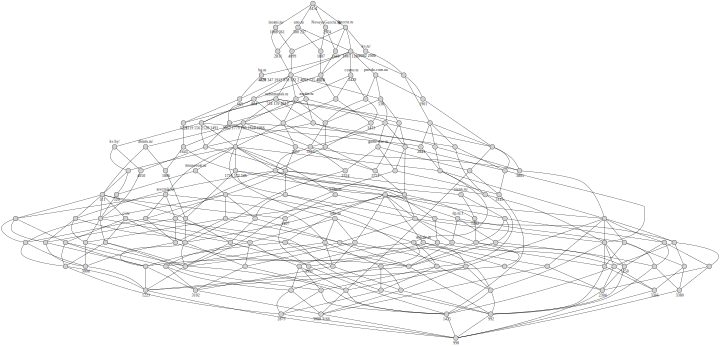

In [163]:
print('HSE News')
SVG(graph_svgs[0])

HSE Money


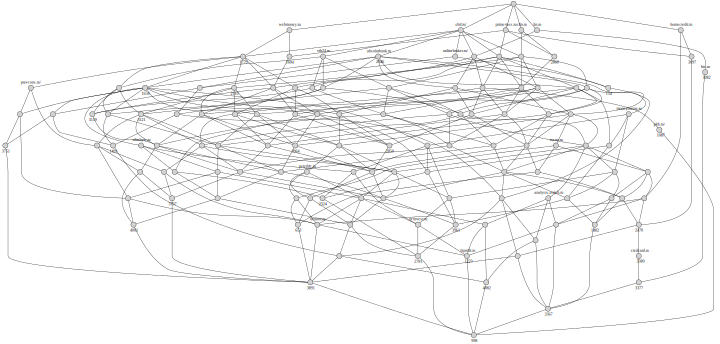

In [164]:
print('HSE Money')
SVG(graph_svgs[1])

HSE Edu


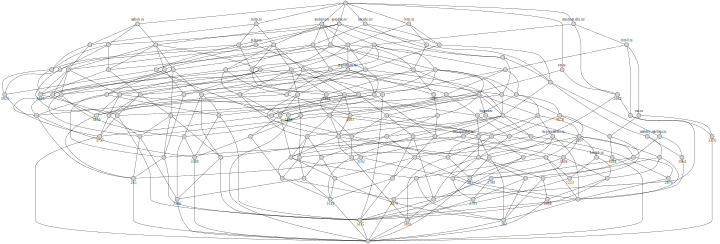

In [165]:
print('HSE Edu')
SVG(graph_svgs[2])

альтернативно можно воспользоваться предложенным в задании программным обеспечением - Concept Explorer (http://conexp.sourceforge.net/)

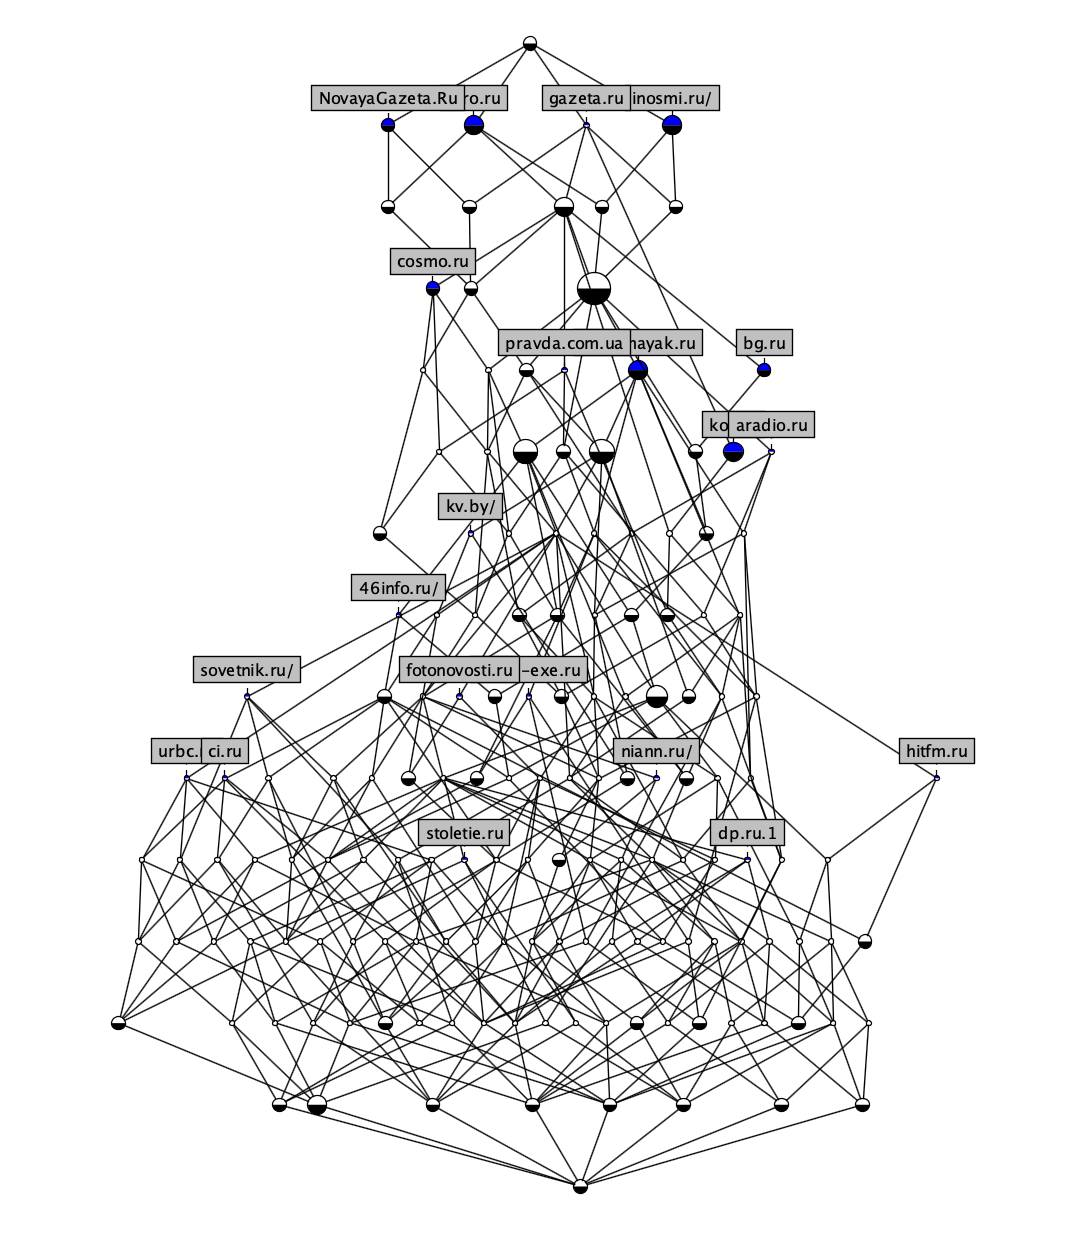

In [101]:
Image('data/3_hse/news_conexp.png')

> **в)** Привести 3-5 примеров понятий в виде пары < размер объема понятия, содержание понятия > для размера содержания 2 и более сайта. Дать содержательную интерпретацию найденных понятий. 

In [208]:
news_c = Context.fromstring(generate_context_string(news_filtered))
money_c = Context.fromstring(generate_context_string(money_filtered))
edu_c = Context.fromstring(generate_context_string(edu_filtered))

для начала для примера возьмем инфимум - минимально общий концепт, содержащий в себе все атрибуты

In [210]:
inf = list(edu_c.lattice)[0]
inf

<Infimum {} <-> [academy.ru englishfirst.ru/ law.edu.ru/ ecsocman.edu.ru/ tests.specialist.ru/ mifp.ru nes.ru hse.spb.ru students.ru mfua.ru hrm.ru intuit.ru rsci.ru specialist.ru/ lingua.ru improvement.ru sachok.ru college.ru]>

In [212]:
print_concept_shape(filter_by_concept(edu_filtered, inf))

Количество обьектов: 0
Количество атрибутов: 18
Количество связей обьект-атрибут: 0


---

возьмем еще пример

In [221]:
money_analysis = list(money_c.lattice)[12]
money_analysis

<Concept {998, 3367, 4082} <-> [analysis.zerich.ru cfin.ru absolutbank.ru onlinebroker.ru/ sbrf.ru/ vtb24.ru prime-tass.ru lin.ru]>

In [248]:
money_analysis_df = money_filtered.loc[money_filtered.index.isin([998, 3367, 4082]), money_filtered.columns.isin(money_analysis.intent)]
money_analysis_df

,analysis.zerich.ru,cfin.ru,absolutbank.ru,onlinebroker.ru/,sbrf.ru/,vtb24.ru,prime-tass.ru,lin.ru
998,1,1,1,1,1,1,1,1
3367,1,1,1,1,1,1,1,1
4082,1,1,1,1,1,1,1,1


In [247]:
print_concept_shape(money_analysis_df)

Количество обьектов: 3
Количество атрибутов: 8
Количество связей обьект-атрибут: 24


В данном случае концепт состоит из 3х пользователей, которые смотрел финансовые сайты. Предположу, что они делали анализ финансовой информации, поскольку среди данных сайтов как и официальные сайты банков, так и новостные сайты по финансовой теме и сайты-справочники по финансовым темам

---

In [324]:
radio_news = list(news_c.lattice)[61]
radio_news

<Concept {2304, 3951, 3380, 1425, 3366, 998} <-> [hitfm.ru inosmi.ru/ gazeta.ru cosmo.ru utro.ru bg.ru radiomayak.ru NovayaGazeta.Ru]>

In [327]:
radion_news_df = news_filtered.loc[news_filtered.index.isin([2304, 3951, 3380, 1425, 3366, 998]), 
                                   news_filtered.columns.isin(radio_news.intent)]
radion_news_df

,hitfm.ru,inosmi.ru/,gazeta.ru,cosmo.ru,utro.ru,bg.ru,radiomayak.ru,NovayaGazeta.Ru
2304,1,1,1,1,1,1,1,1
3951,1,1,1,1,1,1,1,1
3380,1,1,1,1,1,1,1,1
1425,1,1,1,1,1,1,1,1
3366,1,1,1,1,1,1,1,1
998,1,1,1,1,1,1,1,1


In [328]:
print_concept_shape(radion_news_df)

Количество обьектов: 6
Количество атрибутов: 8
Количество связей обьект-атрибут: 48


в данном концепте есть новостные сайты, пара радиостанций, и вероятно аудитория женская - поскольку есть сайт журнала Cosmopolitan

> **г)** Привести пример импликации вида А -> В, найденной по диаграмме решетки понятий с указанием ее поддержки. 

приведем пример

In [348]:
B = radio_news

In [347]:
A = [(x) for x in news_c.lattice if radio_news.implies(x)][20]

In [349]:
A, B

(<Concept {724, 3119, 1716, 3751, 661, 2304, 1643, 139, 3062, 4029, 1779, 1806, 556, 1223, 2407, 3102, 3088, 3145, 785, 2879, 4050, 347, 2841, 2520, 1912, 1482, 572, 878, 582, 546, 2, 4063, 3951, 1491, 536, 311, 3166, 2324, 992, 3380, 804, 1425, 3366, 520, 725, 1250, 4121, 3221, 3004, 3923, 1610, 998, 3805, 4013, 1966, 3957} <-> [inosmi.ru/ gazeta.ru utro.ru] <=> 4029 347 1912 878 582 2 4063 725 4121>,
 <Concept {2304, 3951, 3380, 1425, 3366, 998} <-> [hitfm.ru inosmi.ru/ gazeta.ru cosmo.ru utro.ru bg.ru radiomayak.ru NovayaGazeta.Ru]>)

In [354]:
A.intent, B.intent

(('inosmi.ru/', 'gazeta.ru', 'utro.ru'),
 ('hitfm.ru',
  'inosmi.ru/',
  'gazeta.ru',
  'cosmo.ru',
  'utro.ru',
  'bg.ru',
  'radiomayak.ru',
  'NovayaGazeta.Ru'))

In [353]:
assert set(A.intent) - set(B.intent) == set()

In [342]:
len([(x, radio_news.implies(x)) for x in news_c.lattice if radio_news.implies(x)])

28

In [356]:
len(list(news_c.lattice))

153

_"Импликация, как мы разбирали, и есть частный случай ассоциативного правила со 100% достоверностью"_<br>
поэтому поддержку легко посчитать, как количество обьектов (транзакция) для которых в таблице есть все атрибуты из B

In [388]:
news_filtered.shape

(75, 21)

In [387]:
B_support_df = news_filtered.loc[news_filtered.loc[:, B.intent].sum(axis = 1) == len(B.intent), B.intent]
print(B_support_df.shape)
B_support_df

(6, 8)


,hitfm.ru,inosmi.ru/,gazeta.ru,cosmo.ru,utro.ru,bg.ru,radiomayak.ru,NovayaGazeta.Ru
2304,1,1,1,1,1,1,1,1
3951,1,1,1,1,1,1,1,1
3380,1,1,1,1,1,1,1,1
1425,1,1,1,1,1,1,1,1
3366,1,1,1,1,1,1,1,1
998,1,1,1,1,1,1,1,1


Поддержка A -> B = 6 или 12%